In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from neuron import Neuron
from network import Network

In [3]:
def adjust_train(train, vmin, vrescale, offset):
    return [(x - vmin) / vrescale + offset for x in train]

In [4]:
N = 50
GC = 200 # 100 # 100
DENSITY = .3
TMAX = 100
T_REF = .1
WNOISE = 5000

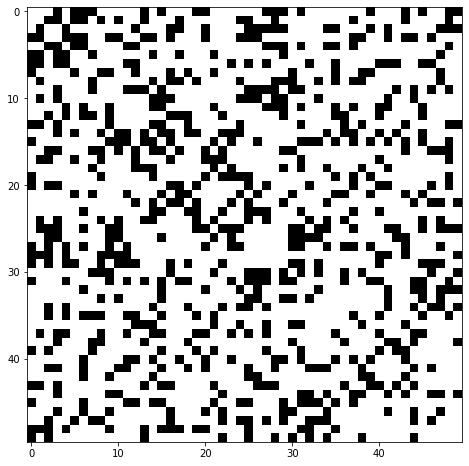

In [5]:
# define edges
edges = []
np.random.seed(1)
for i in range(N):
    for j in range(i+1, N):
        if np.random.rand() < DENSITY and (i, j) not in edges:
            edges.append((i, j))
    
# initiate network
ntwk = Network(num=N, edges=edges, gc=GC, tmax=TMAX, pacemakers=range(N), conn_type='gap_junction', wnoise=WNOISE)

# display connection matrix
ntwk.disp_conn_mat()

In [6]:
# define stimulation
STIM = {20: [25, 26, 27, 28, 29] }

In [7]:
# test external stimulation
ntwk.run(stim=STIM)

100%|██████████| 9999/9999 [00:05<00:00, 1768.56it/s]


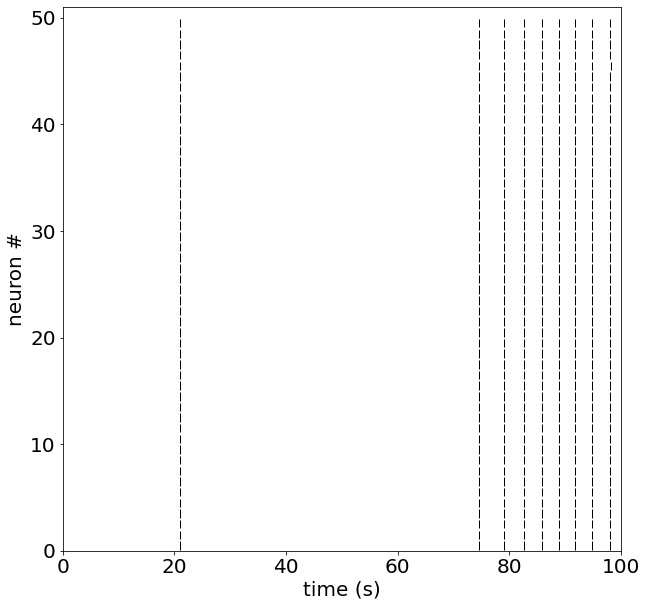

In [8]:
ntwk.disp(figsize=(10, 10), style='spike')

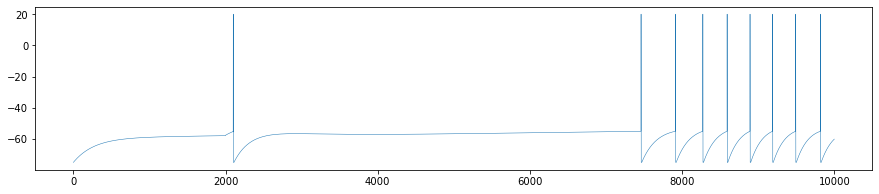

In [9]:
plt.figure(figsize=(15,3))
plt.plot(ntwk.neurons[25].v_train, lw=.5)
plt.show()